# 4.1 - Introduction

In this notebook we describe absorbing boundary conditions and their use combined with the *Hybdrid Absorbing Boundary Condition* (*HABC*). The common points to the previous notebooks <a href="1_introduction.ipynb">Introduction to Acoustic Problem</a>, <a href="2_damping.ipynb">Damping</a> and  <a href="3_pml.ipynb">PML</a> will be used here, with brief descriptions.

# 4.2 - Absorbing Boundary Conditions

 We initially describe absorbing boundary conditions, the so called A1 and A2 Clayton's conditions and
 the scheme from Higdon. These methods can be used as pure boundary conditions, designed to reduce reflections,
 or as part of the Hybrid Absorbing Boundary Condition, in which they are combined with an absorption layer in a manner to be described ahead. 
 
 In the presentation of these boundary conditions we initially consider the wave equation to be solved on
 the spatial domain $\Omega=\left[x_{I},x_{F}\right] \times\left[z_{I},z_{F}\right]$ as show in the figure bellow. More details about the equation and domain definition can be found in the <a href="1_introduction.ipynb">Introduction to Acoustic Problem</a> notebook. 

<img src='domain1.png' width=500>
 
## 4.2.1 - Clayton's A1 Boundary Condition

Clayton's A1 boundary condition is based on a one way wave equation (OWWE). This simple condition
  is such that outgoing waves normal to the border would leave without reflection. At the $\partial \Omega_1$ part of the boundary
    we have, 

- $\displaystyle\frac{\partial u(x,z,t)}{\partial t}-c(x,z)\displaystyle\frac{\partial u(x,z,t)}{\partial x}=0.$

while at $\partial \Omega_3$ the condition is
 
- $\displaystyle\frac{\partial u(x,z,t)}{\partial t}+c(x,z)\displaystyle\frac{\partial u(x,z,t)}{\partial x}=0.$

and at $\partial \Omega_2$

- $\displaystyle\frac{\partial u(x,z,t)}{\partial t}+c(x,z)\displaystyle\frac{\partial u(x,z,t)}{\partial z}=0.$

## 4.2.2 - Clayton's A2 Boundary Condition 

The A2 boundary condition aims to impose a boundary condition that would make outgoing waves leave the domain without being reflected. This condition is approximated (using a Padé approximation in the wave dispersion relation) by the following equation to be imposed on the boundary part $\partial \Omega_1$

- $\displaystyle\frac{\partial^{2} u(x,z,t)}{\partial t^{2}}+c(x,z)\displaystyle\frac{\partial^{2} u(x,z,t)}{\partial x \partial t}+\frac{c^2(x,z)}{2}\displaystyle\frac{\partial^{2} u(x,z,t)}{\partial z^{2}}=0.$

At $\partial \Omega_3$ we have

- $\displaystyle\frac{\partial^{2} u(x,z,t)}{\partial t^{2}}-c(x,z)\displaystyle\frac{\partial^{2} u(x,z,t)}{\partial z \partial t}+\frac{c^2(x,z)}{2}\displaystyle\frac{\partial^{2} u(x,z,t)}{\partial x^{2}}=0.$

while at $\partial \Omega_2$ the condition is

- $\displaystyle\frac{\partial^{2} u(x,z,t)}{\partial t^{2}}-c(x,z)\displaystyle\frac{\partial^{2} u(x,z,t)}{\partial x \partial t}+\frac{c^2(x,z)}{2}\displaystyle\frac{\partial^{2} u(x,z,t)}{\partial z^{2}}=0.$

At the corner points the condition is 

- $\displaystyle\frac{\sqrt{2}\partial u(x,z,t)}{\partial t}+c(x,z)\left(\displaystyle\frac{\partial u(x,z,t)}{\partial x}+\displaystyle\frac{\partial u(x,z,t)}{\partial z}\right)=0.$

## 4.2.3 -  Higdon Boundary Condition

The Higdon Boundary condition of order p is given at $\partial \Omega_1$ and $\partial \Omega_3$n by:

- $\Pi_{j=1}^p(\cos(\alpha_j)\left(\displaystyle\frac{\partial }{\partial t}-c(x,z)\displaystyle\frac{\partial }{\partial x}\right)u(x,z,t)=0.$

and at $\partial \Omega_2$

- $\Pi_{j=1}^p(\cos(\alpha_j)\left(\displaystyle\frac{\partial}{\partial t}-c(x,z)\displaystyle\frac{\partial}{\partial z}\right)u(x,z,t)=0.$

 This method would make that outgoing waves with angle of incidence at the boundary equal to $\alpha_j$ would
 present no reflection. The method we use in this notebook employs order 2 ($p=2$) and angles $0$ and $\pi/4$.
 
 Observation: There are similarities between Clayton's A2 and the Higdon condition. If one chooses $p=2$ and
 both angles equal to zero in Higdon's method, this leads to the condition:
 $ u_{tt}-2cu_{xt}+c^2u_{xx}=0$. But, using the wave equation, we have that $c^2u_{xx}=u_{tt}-c^2u_{zz}$. Replacing this relation in the previous equation, we get: $2u_{tt}-2cu_{xt}-c^2u_{zz}=0$ which is Clayton's A2
 boundary condition. In this sence, Higdon's method would generalize Clayton's scheme. But the discretization of
 both methods are quite different, since in Higdon's scheme the boundary operators are unidirectional, while
 in Clayton's A2 not.

# 4.3 - Acoustic Problem with HABC

In the hybrid absorption boundary condition (HABC) scheme we will also extend the spatial domain as $\Omega=\left[x_{I}-L,x_{F}+L\right] \times\left[z_{I},z_{F}+L\right]$.

We added to the target domain $\Omega_{0}=\left[x_{I},x_{F}\right]\times\left[z_{I},z_{F}\right]$ an extension zone, of length $L$ in both ends of the direction $x$ and at the end of the domain in the direction $z$, as represented in the figure bellow.

<img src='domain2.png' width=500>

 The difference with respect to previous schemes, is that this extended region will now be considered as the union of several gradual extensions. As represented in the next figure, we define a region $A_M=\Omega_{0}$. The regions $A_k, k=M-1,\cdots,1$ will be defined as the previous region $A_{k+1}$ to which we add one extra grid line to the left,
 right and bottom sides of it, such that the final region $A_1=\Omega$ (we thus have $M=L+1$).
 
 <img src='region1.png' width=500>
 
 We now consider the temporal evolution
 of the solution of the HABC method. Suppose that $u(x,z,t-1)$ is the solution at a given instant $t-1$ in all the 
 extended $\Omega$ domain. We update it to instant $t$, using one of the absorbing boundary conditions described in the previous section (A1, A2 or Higdon) producing a preliminar new function $u(x,z,t)$. Now, call $u_{1}(x,z,t)$ the solution at instant $t$ constructed in the extended region, by applying the same absorbing boundary condition at the border of each of the domains  $A_k,k=1,..,M$. The HABC solution will be constructed as a convex combination of $u(x,z,t)$ and $u_{1}(x,z,t)$:
 
- $u(x,z,t) = (1-\omega)u(x,z,t)+\omega u_{1}(x,z,t)$.

The function $u_{1}(x,z,t)$ is defined (and used) only in the extension of the domain. The function $w$ is a 
weight function growing from zero at the boundary $\partial\Omega_{0}$ to one at $\partial\Omega$. The particular weight function to be used could vary linearly, as when the scheme was first proposed by Liu and Sen. But HABC produces better results with a non-linear weight function to be described ahead.

The wave equation employed here will be the same as in the previous notebooks, with same velocity model, source term and initial conditions.



## 4.3.1 The weight  function $\omega$

One can choose a *linear* weight function as 

\begin{equation}
\omega_{k} = \displaystyle\frac{M-k}{M};
\end{equation}

or preferably a *non linear*

\begin{equation}
\omega_{k}=\left\{ \begin{array}{ll}
1, & \textrm{if $1\leq k \leq P+1$,} \\ \left(\displaystyle\frac{M-k}{M-P}\right)^{\alpha} , & \textrm{if $P+2 \leq k \leq  M-1.$} \\ 0 , & \textrm{if $k=M$.}\end{array}\right.
\label{eq:elo8}
\end{equation}  

In general we take $P=2$ and we choose $\alpha$ as follows:

- $\alpha = 1.5 + 0.07(npt-P)$, in the case of A1 and A2;
- $\alpha = 1.0 + 0.15(npt-P)$, in the case of Higdon.

The value *npt* designates the number of discrete points that define the length of the blue band in the direction $x$ and/or $z$.

# 4.4 - Finite Difference Operators and Discretization of Spatial and Temporal Domains

 We employ the same methods as in the previous notebooks. 

# 4.5 - Standard Problem

Redeeming the Standard Problem definitions discussed on the notebook <a href="1_introduction.ipynb">Introduction to Acoustic Problem</a> we have that:

- $x_{I}$ =  0.0 Km;
- $x_{F}$ =  1.0 Km =  1000 m;
- $z_{I}$ =  0.0 Km;
- $z_{F}$ =  1.0 Km =  1000 m;

The spatial discretization parameters are given by:
- $\Delta x$ = 0.01 km = 10m;
- $\Delta z$ = 0.01 km = 10m;

Let's consider a $I$ the time domain with the following limitations:

- $t_{I}$ = 0 s = 0 ms;
- $t_{F}$ = 1 s = 1000 ms;

The temporal discretization parameters are given by:

- $\Delta t$ $\approx$ 0.0016 s = 1.6 ms;
- $NT$ = 621.

The source term, velocity model and positioning of receivers will be as in the previous notebooks.

# 4.6 - Numerical Simulations

For the numerical simulations of this notebook we use several of the notebook codes presented in  <a href="2_damping.ipynb">Damping</a> e <a href="3_pml.ipynb">PML</a>. The new features will be described in more detail.

So, we import the following Python and Devito packages:

In [1]:
import numpy                   as np
import matplotlib.pyplot       as plot
import math                    as mt
import matplotlib.ticker       as mticker    
from   mpl_toolkits.axes_grid1 import make_axes_locatable
from   matplotlib              import cm
import time                    as tm
from   devito import *
%matplotlib inline

From Devito's library of examples we import the following structures:

In [2]:
from   examples.seismic        import TimeAxis
from   examples.seismic        import RickerSource
from   examples.seismic        import Receiver

The mesh parameters that we choose define the domain $\Omega_{0}$ plus the absorption region. For this, we use the following data:

In [3]:
nptx   =  101
nptz   =  101
x0     =  0.
x1     =  1000. 
compx  =  x1-x0
z0     =  0.
z1     =  1000.
compz  =  z1-z0;
hxv    =  (x1-x0)/(nptx-1)
hzv    =  (z1-z0)/(nptz-1)

As we saw previously, HABC has three approach possibilities (A1, A2 and Higdon) and two types of weights (linear and non-linear). So, we insert two control variables. The variable called *habctype* chooses the type of HABC approach and is such that:

- *habctype=1* is equivalent to choosing A1;
- *habctype=2* is equivalent to choosing A2;
- *habctype=3* is equivalent to choosing Higdon;

Regarding the weights, we will introduce the variable *habcw* that chooses the type of weight and is such that:

- *habcw=1* is equivalent to linear weight;
- *habcw=2* is equivalent to non-linear weights;

In this way, we make the following choices:

In [4]:
habctype  = 1
habcw     = 2

The number of points of the absorption layer in the directions $x$ and $z$ are given, respectively, by:

In [5]:
npmlx  = 20
npmlz  = 20

The lengths $L_{x}$ and $L_{z}$ are given, respectively, by:

In [6]:
lx = npmlx*hxv
lz = npmlz*hzv

For the construction of the *grid* we have:

In [7]:
nptx    =  nptx + 2*npmlx
nptz    =  nptz + 1*npmlz
x0      =  x0 - hxv*npmlx
x1      =  x1 + hxv*npmlx
compx   =  x1-x0
z0      =  z0
z1      =  z1 + hzv*npmlz
compz   =  z1-z0
origin  = (x0,z0)
extent  = (compx,compz)
shape   = (nptx,nptz)
spacing = (hxv,hzv)

As in the case of the acoustic equation with Damping and in the acoustic equation with PML, we can define specific regions in our domain, since the solution $u_{1}(x,z,t)$ is only calculated in the blue region. We will soon follow a similar scheme for creating *subdomains* as was done on notebooks <a href="2_damping.ipynb">Damping</a> and <a href="3_pml.ipynb">PML</a>.

First, we define a region corresponding to the entire domain, naming this region as *d0*. In the language of *subdomains* *d0* it is written as:

In [8]:
class d0domain(SubDomain):
    name = 'd0'
    def define(self, dimensions):
        x, z = dimensions
        return {x: x, z: z}
d0_domain = d0domain()

The blue region will be built with 3 divisions:

- *d1* represents the left range in the direction *x*, where the pairs $(x,z)$ satisfy: $x\in\{0,npmlx\}$ and $z\in\{0,nptz\}$;
- *d2* represents the rigth range in the direction *x*, where the pairs $(x,z)$ satisfy: $x\in\{nptx-npmlx,nptx\}$ and $z\in\{0,nptz\}$;
- *d3* represents the left range in the direction *y*, where the pairs $(x,z)$ satisfy: $x\in\{npmlx,nptx-npmlx\}$ and $z\in\{nptz-npmlz,nptz\}$;

Thus, the regions *d1*, *d2* and *d3* aare described as follows in the language of *subdomains*:

In [9]:
class d1domain(SubDomain):
    name = 'd1'
    def define(self, dimensions):
        x, z = dimensions
        return {x: ('left',npmlx), z: z}
d1_domain = d1domain()

class d2domain(SubDomain):
    name = 'd2'
    def define(self, dimensions):
        x, z = dimensions
        return {x: ('right',npmlx), z: z}
d2_domain = d2domain()

class d3domain(SubDomain):
    name = 'd3'
    def define(self, dimensions):
        x, z = dimensions
        if((habctype==3)&(habcw==1)):
            return {x: x, z: ('right',npmlz)}
        else:
            return {x: ('middle', npmlx, npmlx), z: ('right',npmlz)}
d3_domain = d3domain()

The figure below represents the division of domains that we did previously:

<img src='domain3.png' width=500>

After we defining the spatial parameters and constructing the *subdomains*, we then generate the *spatial grid* and set the velocity field:

In [10]:
grid = Grid(origin=origin, extent=extent, shape=shape, subdomains=(d0_domain,d1_domain,d2_domain,d3_domain), dtype=np.float64)

In [11]:
v0 = np.zeros((nptx,nptz))                     
X0 = np.linspace(x0,x1,nptx)
Z0 = np.linspace(z0,z1,nptz)
    
x10 = x0+lx
x11 = x1-lx
        
z10 = z0
z11 = z1 - lz

xm = 0.5*(x10+x11)
zm = 0.5*(z10+z11)
        
pxm = 0
pzm = 0
        
for i in range(0,nptx):
    if(X0[i]==xm): pxm = i
            
for j in range(0,nptz):
    if(Z0[j]==zm): pzm = j
            
p0 = 0    
p1 = pzm
p2 = nptz
        
v0[0:nptx,p0:p1] = 1.5
v0[0:nptx,p1:p2] = 2.5

Time parameters are defined and constructed by the following sequence of commands:

In [12]:
t0    = 0.
tn    = 1000.   
CFL   = 0.4
vmax  = np.amax(v0) 
dtmax = np.float64((min(hxv,hzv)*CFL)/(vmax))
ntmax = int((tn-t0)/dtmax)+1
dt0   = np.float64((tn-t0)/ntmax)

With the temporal parameters, we generate the *temporal grid* with *TimeAxis* as follows:

In [13]:
time_range = TimeAxis(start=t0,stop=tn,num=ntmax+1)
nt         = time_range.num - 1

The symbolic values associated with the spatial and temporal grids that are used in the composition of the equations are given by:

In [14]:
(hx,hz) = grid.spacing_map  
(x, z)  = grid.dimensions     
t       = grid.stepping_dim
dt      = grid.stepping_dim.spacing

We set the Ricker source: 

In [15]:
f0     = 0.01
nfonte = 1
xposf  = 0.5*(compx-2*npmlx*hxv)
zposf  = hzv

In [16]:
src = RickerSource(name='src',grid=grid,f0=f0,npoint=nfonte,time_range=time_range,staggered=NODE,dtype=np.float64)
src.coordinates.data[:, 0] = xposf
src.coordinates.data[:, 1] = zposf

We set the receivers: 

In [17]:
nrec   = nptx
nxpos  = np.linspace(x0,x1,nrec)
nzpos  = hzv

In [18]:
rec = Receiver(name='rec',grid=grid,npoint=nrec,time_range=time_range,staggered=NODE,dtype=np.float64)
rec.coordinates.data[:, 0] = nxpos
rec.coordinates.data[:, 1] = nzpos

The displacement field *u* and the velocity *vel* are allocated:

In [19]:
u = TimeFunction(name="u",grid=grid,time_order=2,space_order=2,staggered=NODE,dtype=np.float64)

In [20]:
vel = Function(name="vel",grid=grid,space_order=2,staggered=NODE,dtype=np.float64)
vel.data[:,:] = v0[:,:]

We include the source term as *src_term* using the following command:

In [21]:
src_term = src.inject(field=u.forward,expr=src*dt**2*vel**2)

The Receivers are again called *rec_term*:

In [22]:
rec_term = rec.interpolate(expr=u)

The next step is to generate the $\omega$ weights, which are selected using the *habcw* variable. Our construction approach will be in two steps: in a first step we build local vectors *weightsx* and *weightsz* that represent the weights in the directions $x$ and $z$, respectively. In a second step, with the *weightsx* and *weightsz* vectors, we distribute them in two global arrays called *Mweightsx* and *Mweightsz* that represent the distribution of these weights along the *grid* in the directions $x$ and $z$ respectively. The *generateweights* function below perform the operations listed previously:

In [23]:
def generateweights():
    
    weightsx   = np.zeros(npmlx)
    weightsz   = np.zeros(npmlz)
    Mweightsx  = np.zeros((nptx,nptz))
    Mweightsz  = np.zeros((nptx,nptz))
    
    if(habcw==1):
    
        for i in range(0,npmlx):
            weightsx[i] = (npmlx-i)/(npmlx)
    
        for i in range(0,npmlz):
            weightsz[i] = (npmlz-i)/(npmlz)
    
    if(habcw==2):
           
        mx = 2
        mz = 2
                   
        if(habctype==3):
            
            alphax  = 1.0 + 0.15*(npmlx-mx)    
            alphaz  = 1.0 + 0.15*(npmlz-mz)
            
        else:
    
            alphax  = 1.5 + 0.07*(npmlx-mx)    
            alphaz  = 1.5 + 0.07*(npmlz-mz)
            
        for i in range(0,npmlx):
                
            if(0<=i<=(mx)):
                weightsx[i] = 1
            elif((mx+1)<=i<=npmlx-1):
                weightsx[i] = ((npmlx-i)/(npmlx-mx))**(alphax)
            else:
                weightsx[i] = 0
    
        for i in range(0,npmlz):
                
            if(0<=i<=(mz)):
                weightsz[i] = 1
            elif((mz+1)<=i<=npmlz-1):
                weightsz[i] = ((npmlz-i)/(npmlz-mz))**(alphaz)
            else:
                weightsz[i] = 0
        
    for k in range(0,npmlx):
            
        ai = k
        af = nptx - k - 1 
        bi = 0
        bf = nptz - k
        Mweightsx[ai,bi:bf] = weightsx[k]
        Mweightsx[af,bi:bf] = weightsx[k]
                        
    for k in range(0,npmlz):
            
        ai = k
        af = nptx - k 
        bf = nptz - k - 1        
        Mweightsz[ai:af,bf] = weightsz[k]
        
    return Mweightsx,Mweightsz

Once the *generateweights* function has been created, we execute it with the following command:

In [24]:
Mweightsx,Mweightsz = generateweights();

Next we create the fields for the weight arrays  *weightsx* and *weightsz*: 

In [25]:
weightsx = Function(name="weightsx",grid=grid,space_order=2,staggered=NODE,dtype=np.float64)
weightsx.data[:,:] = Mweightsx[:,:]

weightsz = Function(name="weightsz",grid=grid,space_order=2,staggered=NODE,dtype=np.float64)
weightsz.data[:,:] = Mweightsz[:,:]

For the discretization of the A2 and Higdon's boundary conditions (to calculate $u_{1}(x,z,t)$) we need  information from three time levels, namely $u(x,z,t-1)$, $u (x,z,t)$ and $u(x,z,t+1)$. So it is convenient to create the three fields:

In [26]:
u1  = Function(name="u1"   ,grid=grid,space_order=2,staggered=NODE,dtype=np.float64)
u2  = Function(name="u2"   ,grid=grid,space_order=2,staggered=NODE,dtype=np.float64)
u3  = Function(name="u3"   ,grid=grid,space_order=2,staggered=NODE,dtype=np.float64)

We will assign to each of them the three time solutions described previously, that is,

- u1(x,z) = u(x,z,t-1);
- u2(x,z) = u(x,z,t);
- u3(x,z) = u(x,z,t+1);

These three assignments can be represented by the *stencil01* given by:

In [27]:
stencil01 = [Eq(u1,u.backward),Eq(u2,u),Eq(u3,u.forward)]

An update of the term *u3(x,z)* will be necessary after updating *u(x,z,t+1)* in the direction $x$, so that we can continue to apply the HABC method. This update is given by *stencil02* defined as:

In [28]:
stencil02 = [Eq(u3,u.forward)]

For the acoustic equation with HABC without the source term we need in $\Omega$ 

- eq1 = u.dt2 - vel0 * vel0 * u.laplace;

So the *pde* that represents this equation is given by:

In [29]:
pde0 = Eq(u.dt2 - u.laplace*vel*vel)

And the *stencil* for *pde0* is given to:

In [30]:
stencil0  = Eq(u.forward, solve(pde0,u.forward))

For the blue region we will divide it into $npmlx$ layers in the $x$ direction and $npmlz$ layers in the $z$ direction. In this case, the representation is a little more complex than shown in the figures that exemplify the regions $A_{k}$ because there are intersections between the layers.

**Observation:** Note that the representation of the $A_{k}$ layers that we present in our text reflects the case where $npmlx=npmlz$. However, our code includes the case illustrated in the figure, as well as situations in which $npmlx\neq npmlz $. The discretizations of the bounadry conditions A1, A2 and Higdon follow in the bibliographic references at the end. They will not be detailled here, but can be seen in the codes below. 

In the sequence of codes below we build the *pdes* that represent the *eqs* of the regions $B_{1}$, $B_{2}$ and $B_{3}$ and/or in the corners (red points in the case of *A2*) as represented in the following figure:

<img src='region2.png' width=500>

In the sequence, we present the *stencils* for each of these *pdes*.

So, for the A1 case we have the following *pdes* and *stencils*:

In [31]:
if(habctype==1):

    # Region B_{1}
    aux1      = ((-vel[x,z]*dt+hx)*u2[x,z] + (vel[x,z]*dt+hx)*u2[x+1,z] + (vel[x,z]*dt-hx)*u3[x+1,z])/(vel[x,z]*dt+hx)
    pde1      = (1-weightsx[x,z])*u3[x,z] + weightsx[x,z]*aux1
    stencil1  = Eq(u.forward,pde1,subdomain = grid.subdomains['d1'])

    # Region B_{3}
    aux2      = ((-vel[x,z]*dt+hx)*u2[x,z] + (vel[x,z]*dt+hx)*u2[x-1,z] + (vel[x,z]*dt-hx)*u3[x-1,z])/(vel[x,z]*dt+hx)
    pde2      = (1-weightsx[x,z])*u3[x,z] + weightsx[x,z]*aux2
    stencil2  = Eq(u.forward,pde2,subdomain = grid.subdomains['d2'])

    # Region B_{2}
    aux3      = ((-vel[x,z]*dt+hz)*u2[x,z] + (vel[x,z]*dt+hz)*u2[x,z-1] + (vel[x,z]*dt-hz)*u3[x,z-1])/(vel[x,z]*dt+hz)
    pde3      = (1-weightsz[x,z])*u3[x,z] + weightsz[x,z]*aux3
    stencil3  = Eq(u.forward,pde3,subdomain = grid.subdomains['d3'])

For the A2 case we have the following *pdes* and *stencils*:

In [32]:
if(habctype==2):
   
    # Region B_{1}
    cte11 =  (1/(2*dt**2)) + (1/(2*dt*hx))*vel[x,z]
    cte21 = -(1/(2*dt**2)) + (1/(2*dt*hx))*vel[x,z] - (1/(2*hz**2))*vel[x,z]*vel[x,z] 
    cte31 = -(1/(2*dt**2)) - (1/(2*dt*hx))*vel[x,z]
    cte41 =  (1/(dt**2))
    cte51 =  (1/(4*hz**2))*vel[x,z]*vel[x,z]

    aux1      = (cte21*(u3[x+1,z] + u1[x,z]) + cte31*u1[x+1,z] + cte41*(u2[x,z]+u2[x+1,z]) + cte51*(u3[x+1,z+1] + u3[x+1,z-1] + u1[x,z+1] + u1[x,z-1]))/cte11
    pde1      = (1-weightsx[x,z])*u3[x,z] + weightsx[x,z]*aux1
    stencil1  = Eq(u.forward,pde1,subdomain = grid.subdomains['d1'])
    
    # Region B_{3}
    cte12 =  (1/(2*dt**2)) + (1/(2*dt*hx))*vel[x,z]
    cte22 = -(1/(2*dt**2)) + (1/(2*dt*hx))*vel[x,z] - (1/(2*hz**2))*vel[x,z]*vel[x,z] 
    cte32 = -(1/(2*dt**2)) - (1/(2*dt*hx))*vel[x,z]
    cte42 =  (1/(dt**2))
    cte52 =  (1/(4*hz**2))*vel[x,z]*vel[x,z]
  
    aux2      = (cte22*(u3[x-1,z] + u1[x,z]) + cte32*u1[x-1,z] + cte42*(u2[x,z]+u2[x-1,z]) + cte52*(u3[x-1,z+1] + u3[x-1,z-1] + u1[x,z+1] + u1[x,z-1]))/cte12
    pde2      = (1-weightsx[x,z])*u3[x,z] + weightsx[x,z]*aux2
    stencil2  = Eq(u.forward,pde2,subdomain = grid.subdomains['d2'])

    # Region B_{2}
    cte13 =  (1/(2*dt**2)) + (1/(2*dt*hz))*vel[x,z]
    cte23 = -(1/(2*dt**2)) + (1/(2*dt*hz))*vel[x,z] - (1/(2*hx**2))*vel[x,z]*vel[x,z] 
    cte33 = -(1/(2*dt**2)) - (1/(2*dt*hz))*vel[x,z]
    cte43 =  (1/(dt**2))
    cte53 =  (1/(4*hx**2))*vel[x,z]*vel[x,z]

    aux3      = (cte23*(u3[x,z-1] + u1[x,z]) + cte33*u1[x,z-1] + cte43*(u2[x,z]+u2[x,z-1]) + cte53*(u3[x+1,z-1] + u3[x-1,z-1] + u1[x+1,z] + u1[x-1,z]))/cte13
    pde3      = (1-weightsz[x,z])*u3[x,z] + weightsz[x,z]*aux3
    stencil3  = Eq(u.forward,pde3,subdomain = grid.subdomains['d3'])

    # Red point rigth side
    stencil4  = [Eq(u[t+1,nptx-1-k,nptz-1-k],(1-weightsz[nptx-1-k,nptz-1-k])*u3[nptx-1-k,nptz-1-k] + 
                 weightsz[nptx-1-k,nptz-1-k]*(((-(1/(4*hx))   + (1/(4*hz)) - (np.sqrt(2))/(4*vel[nptx-1-k,nptz-1-k]*dt))*u3[nptx-1-k,nptz-2-k] 
                 + ((1/(4*hx))  - (1/(4*hz)) - (np.sqrt(2))/(4*vel[nptx-1-k,nptz-1-k]*dt))*u3[nptx-2-k,nptz-1-k] 
                 + ((1/(4*hx))  + (1/(4*hz)) - (np.sqrt(2))/(4*vel[nptx-1-k,nptz-1-k]*dt))*u3[nptx-2-k,nptz-2-k] 
                 + (-(1/(4*hx)) - (1/(4*hz)) + (np.sqrt(2))/(4*vel[nptx-1-k,nptz-1-k]*dt))*u2[nptx-1-k,nptz-1-k] 
                 + (-(1/(4*hx)) + (1/(4*hz)) + (np.sqrt(2))/(4*vel[nptx-1-k,nptz-1-k]*dt))*u2[nptx-1-k,nptz-2-k] 
                 + ((1/(4*hx))  - (1/(4*hz)) + (np.sqrt(2))/(4*vel[nptx-1-k,nptz-1-k]*dt))*u2[nptx-2-k,nptz-1-k] 
                 + ((1/(4*hx))  + (1/(4*hz)) + (np.sqrt(2))/(4*vel[nptx-1-k,nptz-1-k]*dt))*u2[nptx-2-k,nptz-2-k])
                 / (((1/(4*hx)) + (1/(4*hz)) + (np.sqrt(2))/(4*vel[nptx-1-k,nptz-1-k]*dt))))) for k in range(0,npmlz)] 

    # Red point left side
    stencil5  = [Eq(u[t+1,k,nptz-1-k],(1-weightsx[k,nptz-1-k] )*u3[k,nptz-1-k] 
                                + weightsx[k,nptz-1-k]*(( (-(1/(4*hx)) + (1/(4*hz)) - (np.sqrt(2))/(4*vel[k,nptz-1-k]*dt))*u3[k,nptz-2-k] 
                                + ((1/(4*hx))  - (1/(4*hz)) - (np.sqrt(2))/(4*vel[k,nptz-1-k]*dt))*u3[k+1,nptz-1-k] 
                                + ((1/(4*hx))  + (1/(4*hz)) - (np.sqrt(2))/(4*vel[k,nptz-1-k]*dt))*u3[k+1,nptz-2-k] 
                                + (-(1/(4*hx)) - (1/(4*hz)) + (np.sqrt(2))/(4*vel[k,nptz-1-k]*dt))*u2[k,nptz-1-k] 
                                + (-(1/(4*hx)) + (1/(4*hz)) + (np.sqrt(2))/(4*vel[k,nptz-1-k]*dt))*u2[k,nptz-2-k] 
                                + ((1/(4*hx))  - (1/(4*hz)) + (np.sqrt(2))/(4*vel[k,nptz-1-k]*dt))*u2[k+1,nptz-1-k] 
                                + ((1/(4*hx))  + (1/(4*hz)) + (np.sqrt(2))/(4*vel[k,nptz-1-k]*dt))*u2[k+1,nptz-2-k])
                                / (((1/(4*hx)) + (1/(4*hz)) + (np.sqrt(2))/(4*vel[k,nptz-1-k]*dt))))) for k in range(0,npmlx)]

For the Higdon case we have the following *pdes* and *stencils*:

In [33]:
if(habctype==3):

    alpha1 = 0.0
    alpha2 = np.pi/4
    a1 = 0.5
    b1 = 0.5
    a2 = 0.5
    b2 = 0.5

    # Region B_{1}
    gama111 = np.cos(alpha1)*(1-a1)*(1/dt)
    gama121 = np.cos(alpha1)*(a1)*(1/dt)
    gama131 = np.cos(alpha1)*(1-b1)*(1/hx)*vel[x,z]
    gama141 = np.cos(alpha1)*(b1)*(1/hx)*vel[x,z]
            
    gama211 = np.cos(alpha2)*(1-a2)*(1/dt)
    gama221 = np.cos(alpha2)*(a2)*(1/dt)
    gama231 = np.cos(alpha2)*(1-b2)*(1/hx)*vel[x,z]
    gama241 = np.cos(alpha2)*(b2)*(1/hx)*vel[x,z]
            
    c111 =  gama111 + gama131
    c121 = -gama111 + gama141
    c131 =  gama121 - gama131
    c141 = -gama121 - gama141
            
    c211 =  gama211 + gama231
    c221 = -gama211 + gama241
    c231 =  gama221 - gama231
    c241 = -gama221 - gama241

    aux1      = ( u2[x,z]*(-c111*c221-c121*c211) + u3[x+1,z]*(-c111*c231-c131*c211) + u2[x+1,z]*(-c111*c241-c121*c231-c141*c211-c131*c221) 
                + u1[x,z]*(-c121*c221) + u1[x+1,z]*(-c121*c241-c141*c221) + u3[x+2,z]*(-c131*c231) +u2[x+2,z]*(-c131*c241-c141*c231)
                + u1[x+2,z]*(-c141*c241))/(c111*c211)
    pde1      = (1-weightsx[x,z])*u3[x,z] + weightsx[x,z]*aux1
    stencil1  = Eq(u.forward,pde1,subdomain = grid.subdomains['d1'])

    # Region B_{3}
    gama112 = np.cos(alpha1)*(1-a1)*(1/dt)
    gama122 = np.cos(alpha1)*(a1)*(1/dt)
    gama132 = np.cos(alpha1)*(1-b1)*(1/hx)*vel[x,z]
    gama142 = np.cos(alpha1)*(b1)*(1/hx)*vel[x,z]
            
    gama212 = np.cos(alpha2)*(1-a2)*(1/dt)
    gama222 = np.cos(alpha2)*(a2)*(1/dt)
    gama232 = np.cos(alpha2)*(1-b2)*(1/hx)*vel[x,z]
    gama242 = np.cos(alpha2)*(b2)*(1/hx)*vel[x,z]
            
    c112 =  gama112 + gama132
    c122 = -gama112 + gama142
    c132 =  gama122 - gama132
    c142 = -gama122 - gama142
            
    c212 =  gama212 + gama232
    c222 = -gama212 + gama242
    c232 =  gama222 - gama232
    c242 = -gama222 - gama242

    aux2      = ( u2[x,z]*(-c112*c222-c122*c212) + u3[x-1,z]*(-c112*c232-c132*c212) + u2[x-1,z]*(-c112*c242-c122*c232-c142*c212-c132*c222) 
                + u1[x,z]*(-c122*c222) + u1[x-1,z]*(-c122*c242-c142*c222) + u3[x-2,z]*(-c132*c232) +u2[x-2,z]*(-c132*c242-c142*c232)
                + u1[x-2,z]*(-c142*c242))/(c112*c212)
    pde2      = (1-weightsx[x,z])*u3[x,z] + weightsx[x,z]*aux2
    stencil2  = Eq(u.forward,pde2,subdomain = grid.subdomains['d2'])

    # Region B_{2}
    gama113 = np.cos(alpha1)*(1-a1)*(1/dt)
    gama123 = np.cos(alpha1)*(a1)*(1/dt)
    gama133 = np.cos(alpha1)*(1-b1)*(1/hz)*vel[x,z]
    gama143 = np.cos(alpha1)*(b1)*(1/hz)*vel[x,z]
                
    gama213 = np.cos(alpha2)*(1-a2)*(1/dt)
    gama223 = np.cos(alpha2)*(a2)*(1/dt)
    gama233 = np.cos(alpha2)*(1-b2)*(1/hz)*vel[x,z]
    gama243 = np.cos(alpha2)*(b2)*(1/hz)*vel[x,z]
            
    c113 =  gama113 + gama133
    c123 = -gama113 + gama143
    c133 =  gama123 - gama133
    c143 = -gama123 - gama143
            
    c213 =  gama213 + gama233
    c223 = -gama213 + gama243
    c233 =  gama223 - gama233
    c243 = -gama223 - gama243

    aux3      = ( u2[x,z]*(-c113*c223-c123*c213) + u3[x,z-1]*(-c113*c233-c133*c213) + u2[x,z-1]*(-c113*c243-c123*c233-c143*c213-c133*c223) 
                + u1[x,z]*(-c123*c223) + u1[x,z-1]*(-c123*c243-c143*c223) + u3[x,z-2]*(-c133*c233) +u2[x,z-2]*(-c133*c243-c143*c233)
                + u1[x,z-2]*(-c143*c243))/(c113*c213)
    pde3      = (1-weightsz[x,z])*u3[x,z] + weightsz[x,z]*aux3
    stencil3  = Eq(u.forward,pde3,subdomain = grid.subdomains['d3'])

The surface boundary conditions of the problem are the same as in the notebook <a href="1_introduction.ipynb">Introduction to Acoustic Problem</a>. They are placed in the term *bc* and have the following form:

In [34]:
bc  = [Eq(u[t+1,x,0],u[t+1,x,1])]

We will then define the operator (*op*) that will join the acoustic equation, source term, boundary conditions and receivers.

- 1. The acoustic wave equation in the *d0* region: *[stencil01];*
- 2. Source term: *src_term;*
- 3. Updating solutions over time: *[stencil01,stencil02];*
- 4. The acoustic wave equation in the *d1*, *d2* e *d3* regions: *[stencil1,stencil2,stencil3];*
- 5. The equation for red points for A2 method: *[stencil5,stencil4];*
- 6. Boundry Conditions: *bc;*
- 7. Receivers: *rec_term;*

We then define two types of *op*:

- The first *op* is for the cases A1 and Higdon;
- The second *op* is for the case A2;

The *ops* are constructed by the following commands:

In [35]:
if(habctype!=2):
    op  = Operator([stencil0] + src_term + [stencil01,stencil3,stencil02,stencil2,stencil1] + bc + rec_term,subs=grid.spacing_map)
else:
    op  = Operator([stencil0] + src_term + [stencil01,stencil3,stencil02,stencil2,stencil1,stencil02,stencil4,stencil5] + bc + rec_term,subs=grid.spacing_map)

Initially:

In [36]:
u.data[:]  = 0.
u1.data[:] = 0.
u2.data[:] = 0.
u3.data[:] = 0.

We assign to *op* the number of time steps it must execute and the size of the time step in the local variables *time* and *dt*, respectively.

In [37]:
start = tm.time()
op(time=nt,dt=dt0)
end   = tm.time()
print("Elapsed (after compilation) = %s" % (end - start))

Operator `Kernel` run in 0.05 s


Elapsed (after compilation) = 0.19286751747131348


We view the result of the displacement field at the end time using the *graph2d* routine given by:

In [38]:
def graph2d(U,i):    
    plot.figure()
    plot.figure(figsize=(16,8))
    fscale =  1/10**(3)
    x0pml  = x0 + npmlx*hxv
    x1pml  = x1 - npmlx*hxv
    z0pml  = z0            
    z1pml  = z1 - npmlz*hzv
    scale  = np.amax(U[npmlx:-npmlx,0:-npmlz])/50.
    extent = [fscale*x0pml,fscale*x1pml,fscale*z1pml,fscale*z0pml]
    fig = plot.imshow(np.transpose(U[npmlx:-npmlx,0:-npmlz]),vmin=-scale, vmax=scale, cmap=cm.gray, extent=extent)
    plot.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f km'))
    plot.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f km'))
    plot.axis('equal')
    if(i==1): plot.title('Map - Acoustic Problem with Devito - HABC A1')
    if(i==2): plot.title('Map - Acoustic Problem with Devito - HABC A2')
    if(i==3): plot.title('Map - Acoustic Problem with Devito - HABC Higdon')
    plot.grid()
    ax = plot.gca()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = plot.colorbar(fig, cax=cax, format='%.2e')
    cbar.set_label('Displacement [km]')
    plot.draw()
    plot.show()

<Figure size 576x432 with 0 Axes>

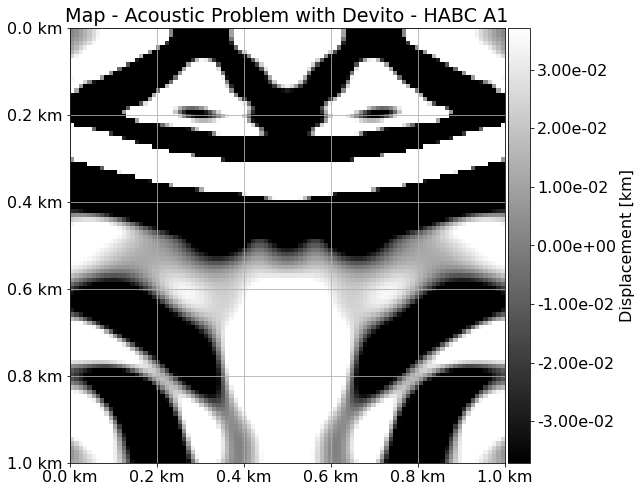

In [39]:
graph2d(u.data[0,:,:],habctype)

We plot the Receivers shot records using the *graph2drec* routine.

In [40]:
def graph2drec(rec,i):    
        plot.figure()
        plot.figure(figsize=(16,8))
        fscaled = 1/10**(3)
        fscalet = 1/10**(3)
        x0pml  = x0 + npmlx*hxv
        x1pml  = x1 - npmlx*hxv
        scale   = np.amax(rec[:,npmlx:-npmlx])/50.
        extent  = [fscaled*x0pml,fscaled*x1pml, fscalet*tn, fscalet*t0]
        fig = plot.imshow(rec[:,npmlx:-npmlx], vmin=-scale, vmax=scale, cmap=cm.gray, extent=extent)
        plot.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f km'))
        plot.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f s'))
        plot.axis('equal')
        if(i==1): plot.title('Receivers Signal Profile - Devito with HABC A1')
        if(i==2): plot.title('Receivers Signal Profile - Devito with HABC A2')
        if(i==3): plot.title('Receivers Signal Profile - Devito with HABC Higdon')
        ax = plot.gca()
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        cbar = plot.colorbar(fig, cax=cax, format='%.2e')
        plot.show()

<Figure size 576x432 with 0 Axes>

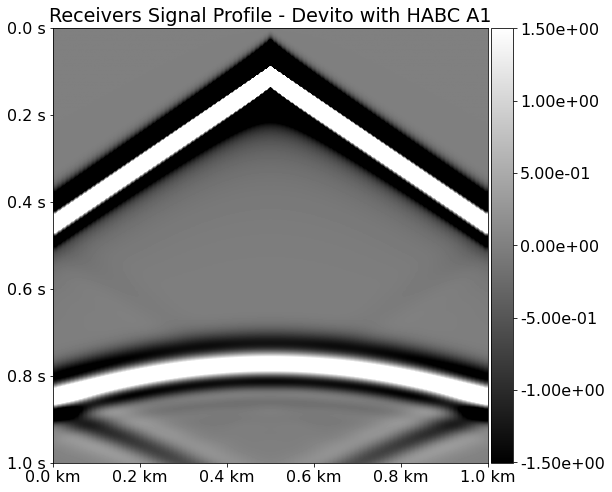

In [41]:
graph2drec(rec.data,habctype)

In [42]:
assert np.isclose(np.linalg.norm(rec.data), 990, rtol=1)

# 4.7 - Conclusions

We have presented the HABC method for the acoustic wave equation, which can be used with any of the 
absorbing boundary conditions A1, A2 or Higdon. The notebook also include the possibility of using these boundary conditions alone, without being combined with the HABC. The user has the possibilty of testing several combinations of parameters and observe the effects in the absorption of spurious reflections on computational boundaries.

 The relevant references for the boundary conditions are furnished next.

## 4.8 - References

- Clayton, R., & Engquist, B. (1977). "Absorbing boundary conditions for acoustic and elastic wave equations", Bulletin of the seismological society of America, 67(6), 1529-1540. <a href="https://pubs.geoscienceworld.org/ssa/bssa/article/67/6/1529/117727?casa_token=4TvjJGJDLQwAAAAA:Wm-3fVLn91tdsdHv9H6Ek7tTQf0jwXVSF10zPQL61lXtYZhaifz7jsHxqTvrHPufARzZC2-lDw">Reference Link.</a>

- Engquist, B., & Majda, A. (1979). "Radiation boundary conditions for acoustic and elastic wave calculations," Communications on pure and applied mathematics, 32(3), 313-357. DOI: 10.1137/0727049.  <a href="https://epubs.siam.org/doi/abs/10.1137/0727049">Reference Link.</a>

- Higdon, R. L. (1987). "Absorbing boundary conditions for difference approximations to the multidimensional wave equation," Mathematics of computation, 47(176), 437-459. DOI: 10.1090/S0025-5718-1986-0856696-4. <a href="https://www.ams.org/journals/mcom/1986-47-176/S0025-5718-1986-0856696-4/">Reference Link.</a>

- Higdon, Robert L. "Numerical absorbing boundary conditions for the wave equation," Mathematics of computation, v. 49, n. 179, p. 65-90, 1987. DOI: 10.1090/S0025-5718-1987-0890254-1. <a href="https://www.ams.org/journals/mcom/1987-49-179/S0025-5718-1987-0890254-1/">Reference Link.</a>

- Liu, Y., & Sen, M. K. (2018). "An improved hybrid absorbing boundary condition for wave equation modeling," Journal of Geophysics and Engineering, 15(6), 2602-2613. DOI: 10.1088/1742-2140/aadd31. <a href="https://academic.oup.com/jge/article/15/6/2602/5209803">Reference Link.</a>